<a href="https://colab.research.google.com/github/noviwdd/UTS-Machine-Learning-2023-2024/blob/main/UTS_Machine_Learning_2023_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
!pip install --upgrade kneed

import numpy as np
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Soal Nomor 2

In [2]:
# Menampilkan dataset
url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
dataset = pd.read_csv(url)
print(dataset)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             842.0     0          2.2         0   1       0         7.0   
1            1021.0     1          0.5         1   0       1        53.0   
2             563.0     1          0.5         1   2       1        41.0   
3             615.0     1          2.5         0   0       0        10.0   
4            1821.0     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995          794.0     1          0.5         1   0       1         2.0   
1996         1965.0     1          2.6         1   0       0        39.0   
1997         1911.0     0          0.9         1   1       1        36.0   
1998         1512.0     0          0.9         0   4       1        46.0   
1999          510.0     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

In [3]:
# Memisahkan atribut prediktor dan atribut label
x = dataset.drop(columns=["price_range"])
y = dataset["price_range"]

print("Atribut Prediktor (Fitur):")
print(x.head())

print("\nAtribut Label:")
print(y.head())

Atribut Prediktor (Fitur):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   th

In [4]:
# Handling Missing Values
imputer = SimpleImputer(strategy="median")

x_imputed = imputer.fit_transform(x)
x_imputed_df = pd.DataFrame(x_imputed, columns=x.columns)

print("Atribut Prediktor setelah Pengisian Missing Values:")
print(x_imputed_df.head())

Atribut Prediktor setelah Pengisian Missing Values:
   battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2146.5   9.0   7.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g 

In [5]:
# Random Sampling
data_sampling = dataset.sample(n = 10, replace=True)
print(data_sampling.head(10))

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1449          602.0     0          0.9         0   9       0        50.0   
667           600.0     0          0.5         0   1       0        48.0   
291          1563.0     0          1.7         1  10       0        16.0   
382          1809.0     1          1.7         0   3       1        59.0   
872           569.0     1          0.5         1  10       1         4.0   
1450         1249.0     1          0.5         0   3       1        55.0   
1386          610.0     1          1.6         1   9       0        52.0   
88            668.0     0          0.5         1   0       0         3.0   
35            725.0     0          1.3         1  16       0        60.0   
1860         1646.0     0          2.5         0   3       1        25.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
1449    0.9      141.0        8  ...       1571      1717  2189.0     7     5   
6

In [6]:
# Scaling Data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed_df)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

print("Atribut Prediktor setelah Scaling:")
print(x_scaled_df.head())

Atribut Prediktor setelah Scaling:
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902700 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.494459  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.539009  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.420414  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.330083  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.381584  0.340740   1.349561 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.161752  0.687548  -0.123125 -0.664768 -0.645989   0.585778  1.704465   
2    0.498273  1.381165   0.131763  0.209639 -0.645989   1.392684  1.074968   
3   -1.215715  1.034357  -0.264729  0.646842 -0.151168   1.286750  1.236971   
4    0.664142  0.340740   0.018479 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_

In [7]:
# Menampilkan Statistik Deskriptif
print("Statistik deskriptif sebelum pengisian missing values:")
print(x.describe())

print("\nStatistik deskriptif setelah pengisian missing values dan standarisasi:")
print(x_scaled_df.describe())

Statistik deskriptif sebelum pengisian missing values:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.40711

# Soal Nomor 3

# Decision Tree

Menggunakan Algoritma ***Decision Tree***

---



In [30]:
# Bagi dataset menjadi data training (80%) dan data testing (20%)
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=0)

In [27]:
dtree_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

In [ ]:
# Visualisasi model Decision Tree dalam bentuk teks
text_representation = tree.export_text(dtree_model, feature_names=list(x.columns))
print(text_representation)

In [ ]:
# Visualisasi model Decision Tree dalam bentuk gambar
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree_model,
               feature_names=list(x.columns),
               class_names=["0", "1", "2", "3"],
               filled=True,
               rounded=True)
plt.show()

In [28]:
y_pred = dtree_model.predict(x_test)

# Hitung Akurasi
accuracy = dtree_model.score(x_test, y_test) * 100
print("Akurasi:", accuracy, "%")

# Hitung confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Tampilkan Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:", report)

Akurasi: 81.75 %
Confusion Matrix:
[[90 15  0  0]
 [ 5 74 12  0]
 [ 0 16 64 12]
 [ 0  0 13 99]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.70      0.81      0.76        91
           2       0.72      0.70      0.71        92
           3       0.89      0.88      0.89       112

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



# Soal Nomor 4

Menggunakan Algoritma ***K-Means***

---



In [14]:
# Inisialisasi model K-Means
kmeans_model = KMeans(init="random", n_clusters=3, n_init=10)
# Latih model dengan data yang telah diproses
kmeans_model.fit(x_scaled_df)

KMeans(init='random', n_clusters=3, n_init=10)

In [15]:
# Detail Model K-Means
print("Sum of Squared Error(SSE):", kmeans_model.inertia_)
print("Koordinat Pusat:", kmeans_model.cluster_centers_)
print("Jumlah Iterasi:", kmeans_model.n_iter_)
print("Label Klaster", kmeans_model.labels_)

Sum of Squared Error(SSE): 35466.9240534221
Koordinat Pusat: [[-2.25929060e-02  5.40278587e-02  8.29702032e-02  2.50296755e-02
  -3.20308023e-03 -1.04396559e+00  2.06003018e-02  2.15592111e-02
  -6.33850321e-03  2.63252384e-02  2.36155130e-03  5.57031379e-02
  -6.25369983e-04 -2.71108112e-02 -2.15011793e-02 -5.52876005e-02
   7.62775587e-02 -1.78686097e+00 -2.48683722e-02 -7.71144758e-03]
 [ 9.03782572e-02 -3.47301711e-02  4.25208270e-03 -1.14867381e-01
   8.84503554e-01  2.95931863e-01 -1.40917553e-01 -2.04733449e-02
   5.40840532e-02 -4.52798897e-02  9.34645433e-01 -7.00323871e-02
  -8.18838700e-02  8.30759095e-02 -3.63576455e-02 -2.05918154e-02
   3.24934571e-02  5.59640631e-01  8.02634256e-02 -7.61096955e-03]
 [-5.10590556e-02 -4.49297828e-03 -4.70887299e-02  6.68537627e-02
  -6.15575647e-01  3.48626802e-01  8.73891237e-02  2.82337817e-03
  -3.43736357e-02  1.76009723e-02 -6.53527872e-01  1.92529292e-02
   5.74778195e-02 -4.35603817e-02  3.68070776e-02  4.37710835e-02
  -6.32389071

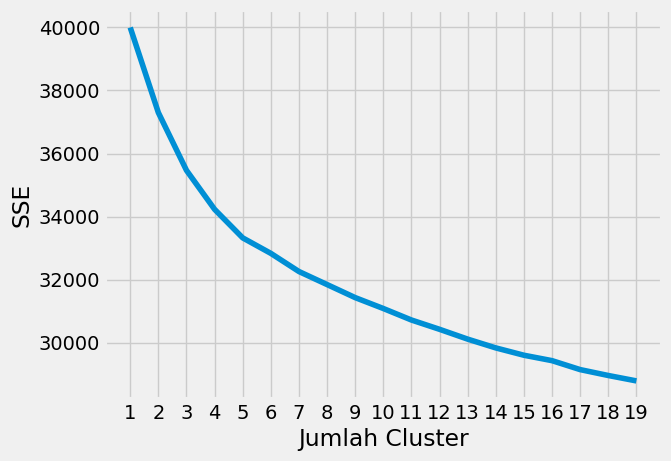

Jumlah klaster optimal (Elbow Point): 5


In [16]:
# Menentukan jumlah klaster optimal
kmeans_kwargs = {"init": "random", "n_init": 10}
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_df)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Jumlah Cluster")
plt.ylabel("SSE")
plt.show()

# KneeLocator untuk menentukan jumlah klaster optimal (elbow point)
kl = KneeLocator(x=range(1, 20), y=sse, curve="convex", direction="decreasing")
optimal_cluster_count = kl.elbow

print("Jumlah klaster optimal (Elbow Point):", optimal_cluster_count)

Silhouette Score: [0.067724062611456, 0.0656206953557934, 0.05825890662988278, 0.0539463566674564, 0.047748612993790816, 0.048644940378148024, 0.04772067016057992, 0.04632408914912659, 0.04536624878416481, 0.04524892291864635, 0.04431754742773411, 0.04445176689270375, 0.04464722097754022, 0.045481899552128474, 0.04542578164423719, 0.0464326412478997, 0.04633661087060364, 0.04666432974687405, 0.04672178302473081]


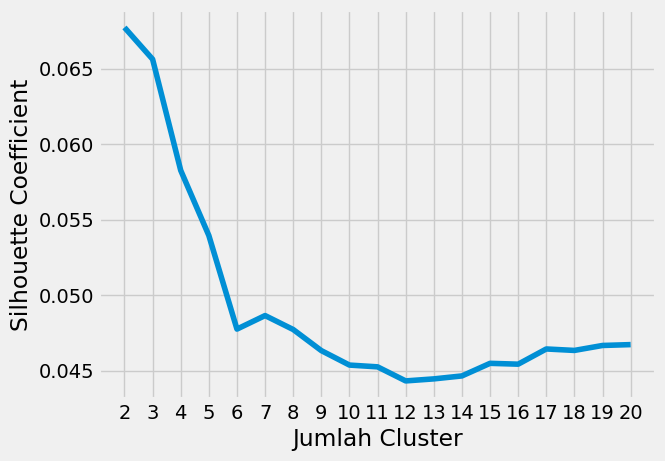

In [17]:
# Menampilkan Silhouette Coefficients
kmeans_kwargs = {"init": "random", "n_init": 10}
silhouette_coefficients = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_scaled_df)
    score = silhouette_score(x_scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

print("Silhouette Score:", silhouette_coefficients)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()